In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/unridd-intrusion-detection-dataset/UNR-IDD.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import pandas as pd
import io

In [3]:
data=pd.read_csv('../input/unridd-intrusion-detection-dataset/UNR-IDD.csv')

In [4]:
data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [5]:
data.dtypes

Switch ID                        object
Port Number                      object
Received Packets                  int64
Received Bytes                    int64
Sent Bytes                        int64
Sent Packets                      int64
Port alive Duration (S)           int64
Packets Rx Dropped                int64
Packets Tx Dropped                int64
Packets Rx Errors                 int64
Packets Tx Errors                 int64
Delta Received Packets            int64
Delta Received Bytes              int64
Delta Sent Bytes                  int64
Delta Sent Packets                int64
Delta Port alive Duration (S)     int64
Delta Packets Rx Dropped          int64
 Delta Packets Tx Dropped         int64
Delta Packets Rx Errors           int64
Delta Packets Tx Errors           int64
Connection Point                  int64
Total Load/Rate                   int64
Total Load/Latest                 int64
Unknown Load/Rate                 int64
Unknown Load/Latest               int64


# # **Label Encoder**

In [6]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

data['Label1'] = labelencoder.fit_transform(data['Label'])
data['Port Number 1'] = labelencoder.fit_transform(data['Port Number'])
data
data.groupby(["Label1",'Label']).size()
data.groupby(['Packets Rx Dropped']).size()
data.groupby(['Packets Tx Dropped']).size()
data.groupby(['Packets Tx Errors']).size()
data.groupby(['Packets Rx Errors']).size()


Packets Rx Errors
0    37411
dtype: int64

In [7]:
data.corrwith(data['Label1'], axis = 0)

Received Packets                -0.043091
Received Bytes                  -0.450800
Sent Bytes                      -0.435915
Sent Packets                    -0.083516
Port alive Duration (S)         -0.730576
Packets Rx Dropped                    NaN
Packets Tx Dropped                    NaN
Packets Rx Errors                     NaN
Packets Tx Errors                     NaN
Delta Received Packets           0.115038
Delta Received Bytes            -0.023256
Delta Sent Bytes                -0.020413
Delta Sent Packets               0.109928
Delta Port alive Duration (S)   -0.026892
Delta Packets Rx Dropped              NaN
 Delta Packets Tx Dropped             NaN
Delta Packets Rx Errors               NaN
Delta Packets Tx Errors               NaN
Connection Point                -0.139914
Total Load/Rate                  0.005544
Total Load/Latest                0.054016
Unknown Load/Rate                0.005544
Unknown Load/Latest              0.054016
Latest bytes counter             0

In [8]:
data.isna().sum()
data = data[['Received Packets', 'Received Bytes', 'Sent Packets','Port alive Duration (S)','Delta Received Packets','Delta Received Bytes',
             'Delta Sent Bytes','Delta Sent Packets','Delta Port alive Duration (S)','Connection Point','Total Load/Latest','Packets Looked Up',
             'Packets Matched','Label1','Label']]

In [9]:
data.columns

Index(['Received Packets', 'Received Bytes', 'Sent Packets',
       'Port alive Duration (S)', 'Delta Received Packets',
       'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Connection Point',
       'Total Load/Latest', 'Packets Looked Up', 'Packets Matched', 'Label1',
       'Label'],
      dtype='object')

In [10]:
data.describe()

,Received Packets,Received Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Latest,Packets Looked Up,Packets Matched,Label1
count,37411.000000,3.741100e+04,37411.000000,37411.000000,37411.000000,3.741100e+04,3.741100e+04,37411.000000,37411.000000,37411.000000,3.741100e+04,3.741100e+04,3.741100e+04,37411.000000
mean,21618.897169,2.647491e+07,33626.824009,911.096415,194.958087,3.427001e+05,3.145126e+05,178.083264,4.842934,2.437839,5.145597e+05,1.008636e+05,1.007444e+05,2.663174
std,65283.170126,3.703044e+07,88792.970378,982.113446,1087.140797,1.203131e+06,1.154213e+06,1032.533005,0.363868,1.149994,1.863403e+06,2.350297e+05,2.350284e+05,1.959171
min,9.000000,7.860000e+02,41.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.000000,0.000000e+00,8.700000e+01,3.700000e+01,0.000000
25%,329.000000,9.104050e+04,347.000000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.000000,0.000000e+00,2.367000e+03,2.272000e+03,1.000000
50%,1170.000000,1.263052e+07,1240.000000,259.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.000000,0.000000e+00,7.472000e+03,7.349000e+03,3.000000
75%,3417.000000,3.783230e+07,3968.000000,1747.000000,6.000000,8.030000e+02,7.590000e+02,5.000000,5.000000,3.000000,0.000000e+00,2.343700e+04,2.322000e+04,4.000000
max,352772.000000,2.715925e+08,421598.000000,3317.000000,15695.000000,6.647966e+06,6.647970e+06,15659.000000,5.000000,5.000000,2.606759e+07,1.012574e+06,1.012439e+06,5.000000


# #Split 
# X - independent features(excluding target variable), 
# y - dependent variables, called (target).

In [11]:
X = data[['Received Packets', 'Received Bytes', 'Sent Packets','Port alive Duration (S)','Delta Received Packets','Delta Received Bytes',
             'Delta Sent Bytes','Delta Sent Packets','Delta Port alive Duration (S)','Connection Point','Total Load/Latest','Packets Looked Up',
             'Packets Matched']]  #independent columns
y = data['Label1']    #target column i.e price range

In [12]:
#Dataset preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
scaled_features = pd.DataFrame(x_scaled)
scaled_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000349,0.000031,0.000467,0.006077,0.000000,0.000000,3.008563e-07,0.000000,1.0,0.00,0.0,0.000672,0.000643
1,0.000505,0.023210,0.000308,0.006077,0.009302,0.888718,8.560866e-04,0.005237,1.0,0.25,0.0,0.000672,0.000643
2,0.000641,0.023236,0.000040,0.006077,0.000127,0.000042,3.008563e-07,0.000000,1.0,0.50,0.0,0.000672,0.000643
3,0.000142,0.000026,0.000334,0.006077,0.000127,0.000042,3.008563e-07,0.000000,1.0,0.75,0.0,0.000672,0.000643
4,0.000507,0.023210,0.000337,0.006077,0.000000,0.000000,3.008563e-07,0.000000,1.0,0.00,0.0,0.000397,0.000362


[0.08475359 0.09026887 0.10377655 0.24657391 0.02970279 0.02137715
 0.0212719  0.02485775 0.0053181  0.05704428 0.0191977  0.14977597
 0.14608145]


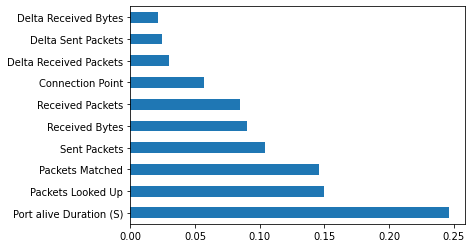

In [13]:
##Feature Importance
import pandas as pd
import numpy as np


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_scaled,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# **Compare Machine learning Algorithms**

In [14]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import xgboost as xgb
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
plt.style.use('ggplot')

# **Split to train and test data**

In [15]:
seed = 50

X = scaled_features; y = data['Label1']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10)

In [16]:
# Application of all Machine Learning methods
MLA = [
    #GLM
    linear_model.LogisticRegressionCV(),
    #linear_model.PassiveAggressiveClassifier(),
   # linear_model. RidgeClassifierCV(),
    #linear_model.SGDClassifier(),
    ##linear_model.Perceptron(),
    
    #Ensemble Methods
   # ensemble.AdaBoostClassifier(),
    #ensemble.BaggingClassifier(),
   # ensemble.ExtraTreesClassifier(),
   # ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    xgb.XGBClassifier(),
    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),
    
    #SVM
    svm.SVC(probability=True),
   # svm.NuSVC(probability=True),
   # svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
  
    #Navies Bayes
    #naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]

In [17]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    #MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted, average=None)
    #MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted, average=None)
    #MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
#MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,MLA used,Train Accuracy,Test Accuracy
0,LogisticRegressionCV,0.7405,0.7391
1,RandomForestClassifier,1.0000,0.9326
2,XGBClassifier,0.9900,0.9469
3,SVC,0.7315,0.7249
4,DecisionTreeClassifier,1.0000,0.9030
5,GaussianNB,0.6461,0.6520
6,KNeighborsClassifier,0.8852,0.8160
